# Global Youtube Analysis

**1. Problem Definition and Understanding**
1. We are encountering a **Learning Problem**. We are going to use global Youtube statistics for 2023 to analyze a Youtuber's subscriber count and their upload count, as well as other relationships between attributes.

2. The task is to determine how a Youtuber's **upload count** will affect their **subscriber count**.

3. This is a great oppportunity to analyze how much a Youtuber needs to post on average to grow their audience. Possible constraints are varying upload schedule of the Youtuber over the years as well as channels that provide other services, such as Youtube's own Gaming channel, which focuses on connecting users with up and coming channels.


**2. Data Collection and Processing**

1. To solve the problem, we are using a dataset with global Youtube Statistics as of 2023.

2. To clean up the data, we edited the names of some of the Youtubers. Some characters in the names were from their respective country so names were edited to be represented using English language letters. For example, "ช่อง8 : Thai Ch8" was edited to be shown as simply "Thai Ch8".
  - Although not specific to our current scope, each channel had their country of origin added where they were not shown before. Furthermore, attributes that were not a numeric value were removed to help with the processing of the data.
  - Seeing that there is a lot of data with varying subscriber counts and upload counts, the data pool was reduced to United States channels to reduce the amount of noise in the model.

3. To explore the data, we found important information about the data such as the top youtuber's views, upload counts, top subscriber counts, an analysis of the shape of the dataset, the types of attributes, and descriptive statistics of the dataset.

**3. Model Selection and Implementation**

1. We selected the Linear Regression Model to determine how the views of a channel can predict the subscriber count of a Youtube channel. This is classified as Supervised Learning.

2. To achieve the model, several libraries were used:
  - pandas
  - matplotlib
  - google.colab
  - seaborn
  - numpy
  - sklearn
3. To optimize and fine tune the model, some data was removed:
  - Any rows or attributes that were not numbers were removed.
  - Any channels with more than 6,000 uploads were removed.
  - All countries that were not the United States were removed.
  - All channels with 1 view or less were removed.
We found the removal of this data to result in more accurate predictions.

4. While this is a good model, the amount of solid correlations between the different attributes in the data is scarce. Most of the correlation was between the amount of views and revenue made in the past 30 days, as well as a strong correlation between the views and subscriber count. This makes it difficult for the model to find a robust prediction. Perhaps more tuning is required.

**4.  Model Optimization and Tuning**

1. At first the training for the model was the data in the order that it came in: by subscriber count, descending. We first tried running the model with the features as the upload count of each Youtube channel and the subscriber count as the target. As the model was fine tuned, we focused more on the relation between video views and subscriber count because the correlation was more solid.

2.  Training the model by descending subscriber count worked, but K-fold cross-validation was used to experiment wiht the model training. Cross-validation provided a better trained model, shown by  a more accurate slope and intercept.

**5. Data Visualization**
1. Although we started off with subscriber count and upload count as our respective target and feature, it became clear that there is a stronger correlation between video views and subscriber count. To analyze the correlation between all attributes, we created a bar graph that showed that one of the best relations was subscriber count and video views.

2.  To further visualize the correlation of the data, we created a heat map that more clearly illustrated the relations between each attribute and the rest. The results were clear that one of the best relations is between subscriber count and video views, which reinforced our decision to focus on video views and subscriber count.

**6. Results and Conclusion**

1. The results indicate there is a strong relation between video views and subscriber count. However, it must be taken into account that the Youtube algorithm that determines recommendations to users are quite complex. A Youtuber's subscriber count or upload count may mean they get more views, but at Youtube there are more factors that are taken into account such as video length, age rating, past strikes a channel has taken, and overall engagement with a video such as like/dislike ratio and discussion in the comments.


In [ ]:
#@title Load the dataset (Global_YouTube_Statistics_2023_pruned.csv)
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Mount Google Drive - the file is too large; we opted for this method of uploading the file to Colab.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Read the file from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Global_YouTube_Statistics_2023_pruned.csv' #Set file path as needed. The file will be selected from Google Drive.
youtube_df = pd.read_csv(file_path,header=1, encoding='ISO-8859-1')
print(youtube_df)


     rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
979   991             Natan por AÃ¯Â¿     12300000  9.029610e+09   
980   992    Free Fire India Official     12300000  1.674410e+09   
981   993                       Panda     12300000  2.214684e+09   
982   994                 RobTopGames     12300000  3.741235e+08   
983   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation      

In [ ]:
#@title Inspecting the Dataframe

# Remove all channels where 'video views' < 1 and readjust rankings'
youtube_df = youtube_df[youtube_df['video views'] > 1 ]
youtube_df.reset_index(drop=True, inplace=True)

youtube_df = youtube_df.copy()

youtube_df['rank'] = youtube_df['subscribers'].rank(ascending=False, method='min').astype(int)

# Print the shape of the dataframe
print("Shape of the dataframe:", youtube_df.shape)

# Displaying the DataFrame
display(youtube_df.head())

# Inspecting the DataFrame
youtube_df.info()


Shape of the dataframe: (976, 25)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Population,Unemployment rate,Urban_population
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,1.366418e+09,5.36,471031528.0
1,2,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,3.282395e+08,14.70,270663028.0
2,3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,3.282395e+08,14.70,270663028.0
3,4,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,1.366418e+09,5.36,471031528.0
4,5,Kids Diana Show,112000000,9.324704e+10,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,3.282395e+08,14.70,270663028.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              976 non-null    int64  
 1   Youtuber                          976 non-null    object 
 2   subscribers                       976 non-null    int64  
 3   video views                       976 non-null    float64
 4   category                          943 non-null    object 
 5   Title                             976 non-null    object 
 6   uploads                           976 non-null    int64  
 7   Country                           963 non-null    object 
 8   Abbreviation                      961 non-null    object 
 9   channel_type                      951 non-null    object 
 10  video_views_rank                  975 non-null    float64
 11  country_rank                      867 non-null    float64
 12  channel_

In [ ]:
#@title Investigate the data

uploads = youtube_df['uploads'].dropna()

count = uploads.sum()
min_uploads = uploads.min()
max_uploads = uploads.max()
upload_range = max_uploads - min_uploads
mean_upload = uploads.mean()
median_upload = uploads.median()
mode_uploads = uploads.mode().values[0]
variance_uploads = uploads.var()
std_dev_uploads = uploads.std()

uploads_by_channel = youtube_df.groupby('Youtuber')['uploads'].sum().dropna()

top_uploaders = uploads_by_channel.sort_values(ascending=False)

subs_by_channel = youtube_df.groupby('Youtuber')['subscribers'].sum().dropna()

top_subs = subs_by_channel.sort_values(ascending=False)

views_by_channel = youtube_df.groupby('Youtuber')['video views'].sum().dropna()

top_views = views_by_channel.sort_values(ascending=False)

# Print the Descriptive Statistics
print(f"1. Count of uploads: {count}")
print(f"2. Minimum uploads: {min_uploads:.2f}")
print(f"3. Maximum uploads: {max_uploads:.2f}")
print(f"4. Upload range: {upload_range:.2f}")
print(f"5. Mean Upload: {mean_upload:.2f}")
print(f"6. Median Upload: {median_upload:.2f}")
print(f"7. Mode of Uploads: {mode_uploads:.2f}")
print(f"8. Variance of Uploads: {variance_uploads:.2f}")
print(f"9. Standard Deviation of Uploads: {std_dev_uploads:.2f}")

print("\nChannels with the Most Uploads: ")
print(top_uploaders)

print("\nChannels with the Most Subscribers: ")
print(top_subs)

print("\nChannels with the Most Views: ")
print(top_views)

# Visualizing Raw Data
print(youtube_df.head().transpose())


1. Count of uploads: 9161882
2. Minimum uploads: 0.00
3. Maximum uploads: 301308.00
4. Upload range: 301308.00
5. Mean Upload: 9387.17
6. Median Upload: 748.50
7. Mode of Uploads: 0.00
8. Variance of Uploads: 1187383186.53
9. Standard Deviation of Uploads: 34458.43

Channels with the Most Uploads: 
Youtuber
ABP NEWS                 301308
GMA Integrated News      296272
TV9 Bharatvarsh          293516
Aaj Tak                  283775
IndiaTV                  273255
                          ...  
Fede Vigevani                 0
Frost Diamond                 0
Good Mythical Morning         0
Harry Styles                  0
TheRichest                    0
Name: uploads, Length: 973, dtype: int64

Channels with the Most Subscribers: 
Youtuber
T-Series                      245000000
MrBeast                       166000000
Cocomelon - Nursery Rhymes    162000000
SET India                     159000000
Kids Diana Show               112000000
                                ...    
Make Joke O

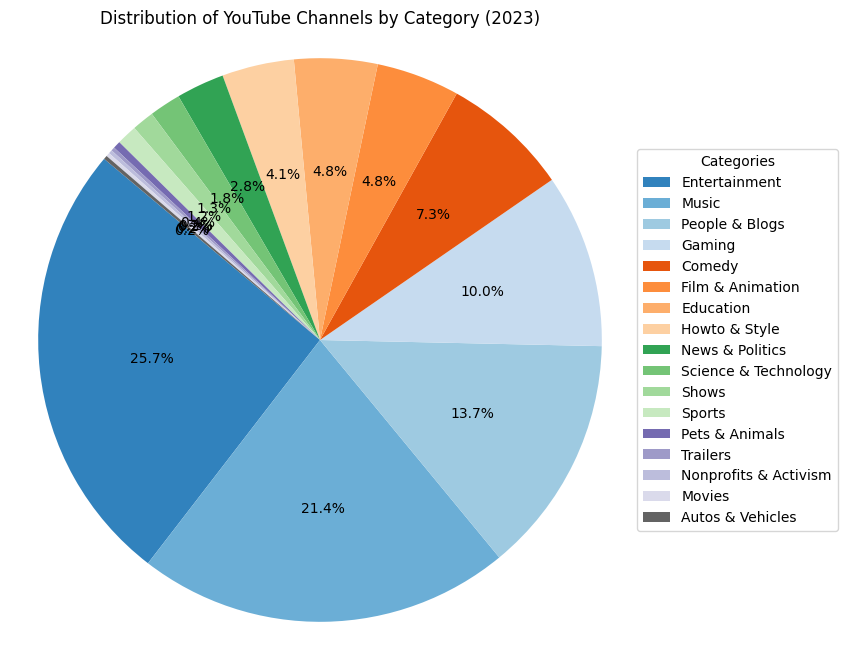

In [ ]:
#@title Pie Chart Representation of Youtube Channels by Category

# Group the data by the 'category' column and count the number of channels in each category
category_counts = youtube_df['category'].value_counts()

# Create a custom color palette with unique colors for each category
num_categories = len(category_counts)
color_palette = plt.cm.tab20c(range(num_categories))  # You can choose a different colormap if needed

# Create a pie chart without labels
plt.figure(figsize=(8, 8))
plt.pie(category_counts, autopct='%1.1f%%', startangle=140, colors=color_palette)
plt.title('Distribution of YouTube Channels by Category (2023)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(category_counts.index, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()

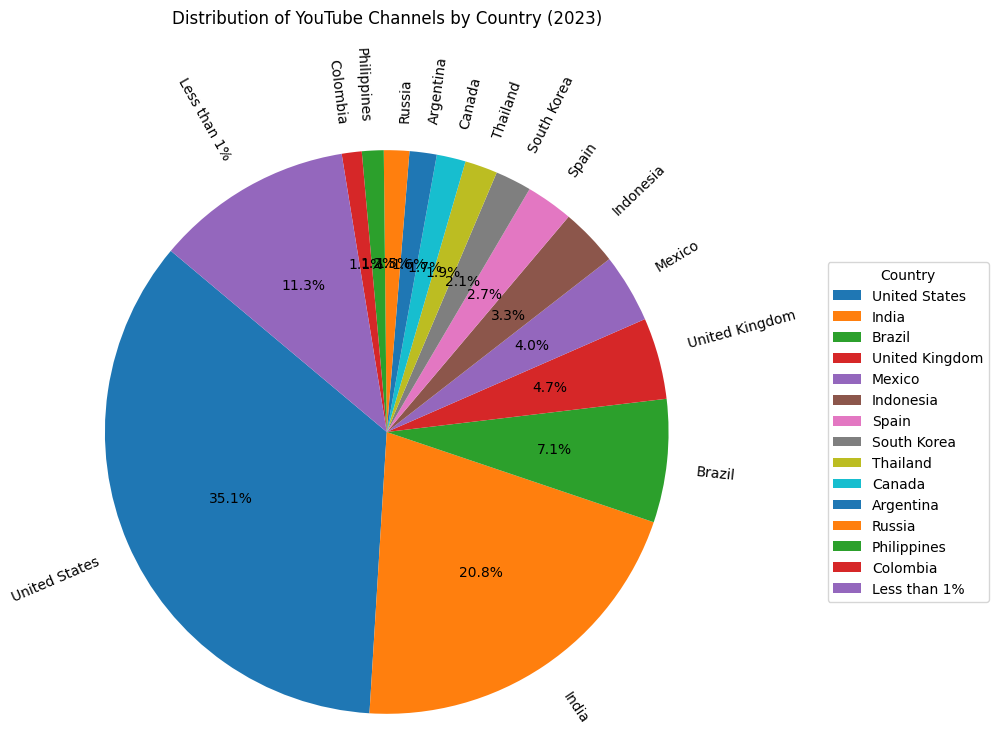

In [ ]:
#@title Pie Chart Representation of Youtube channels by country of origin
# Group the data by the 'country' column and count the number of channels in each country
country_counts = youtube_df['Country'].value_counts()

# Calculate the total number of channels
total_channels = len(youtube_df)

# Filter countries with less than 1% of the total channels
limit = 0.01 * total_channels
filtered_country_counts = country_counts[country_counts >= limit]
other_count = country_counts[country_counts < limit].sum()

# Add the "Less than 1%" category
filtered_country_counts['Less than 1%'] = other_count

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_country_counts, labels=filtered_country_counts.index, autopct='%1.1f%%', startangle=140, rotatelabels=True)
plt.title('Distribution of YouTube Channels by Country (2023)', y=1.15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(filtered_country_counts.index, title='Country', loc='center left', bbox_to_anchor=(1.2, 0.5))

# Display the pie chart
plt.show()


In [ ]:
#@title Cleaning the data
from sklearn.model_selection import train_test_split

# Select only numeric columns
numeric_columns = youtube_df.select_dtypes(include=['number'])

# Filter the DataFrame to keep only rows with uploads <= 6,000
youtube_df = youtube_df[youtube_df['uploads'] <= 6000]

#Filter the DataFrame to keep channels with video views <= 75,000,000,000 - Optional
youtube_df = youtube_df[youtube_df['video views'] <= 75000000000]

# Filter the DataFrame to keep only rows with 'country' = 'United States' to donwsize the data pool
youtube_df = youtube_df[youtube_df['Country'] == "United States" ]

# Remove rows with 'NaN' values in any of the numeric columns
youtube_df = youtube_df.dropna(subset=numeric_columns.columns)

# Drop non-numeric columns from the DataFrame
youtube_df = youtube_df[numeric_columns.columns]

# Reset the index and 'rank' attribute of the DataFrame
youtube_df = youtube_df.reset_index(drop=True)
youtube_df['rank'] = range(1, len(youtube_df) + 1)

# Displaying the DataFrame
display(youtube_df.head())

# Inspecting the DataFrame
youtube_df.info()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Population,Unemployment rate,Urban_population
0,1,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,20.0,328239523.0,14.7,270663028.0
1,2,68200000,3.884323e+10,2865,23.0,8.0,2.0,4.733870e+08,118300.0,1900000.0,1400000.0,22700000.0,600000.0,2011.0,14.0,328239523.0,14.7,270663028.0
2,3,59500000,1.624155e+10,389,182.0,9.0,3.0,1.412000e+08,35300.0,564800.0,423600.0,6800000.0,100000.0,2009.0,17.0,328239523.0,14.7,270663028.0
3,4,56900000,2.707387e+10,156,59.0,10.0,14.0,2.601930e+08,65000.0,1000000.0,780600.0,12500000.0,300000.0,2007.0,9.0,328239523.0,14.7,270663028.0
4,5,56400000,1.469600e+10,436,233.0,11.0,15.0,1.121000e+08,28000.0,448400.0,336300.0,5400000.0,100000.0,2015.0,6.0,328239523.0,14.7,270663028.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              172 non-null    int64  
 1   subscribers                       172 non-null    int64  
 2   video views                       172 non-null    float64
 3   uploads                           172 non-null    int64  
 4   video_views_rank                  172 non-null    float64
 5   country_rank                      172 non-null    float64
 6   channel_type_rank                 172 non-null    float64
 7   video_views_for_the_last_30_days  172 non-null    float64
 8   lowest_monthly_earnings           172 non-null    float64
 9   highest_monthly_earnings          172 non-null    float64
 10  lowest_yearly_earnings            172 non-null    float64
 11  highest_yearly_earnings           172 non-null    float64
 12  subscrib

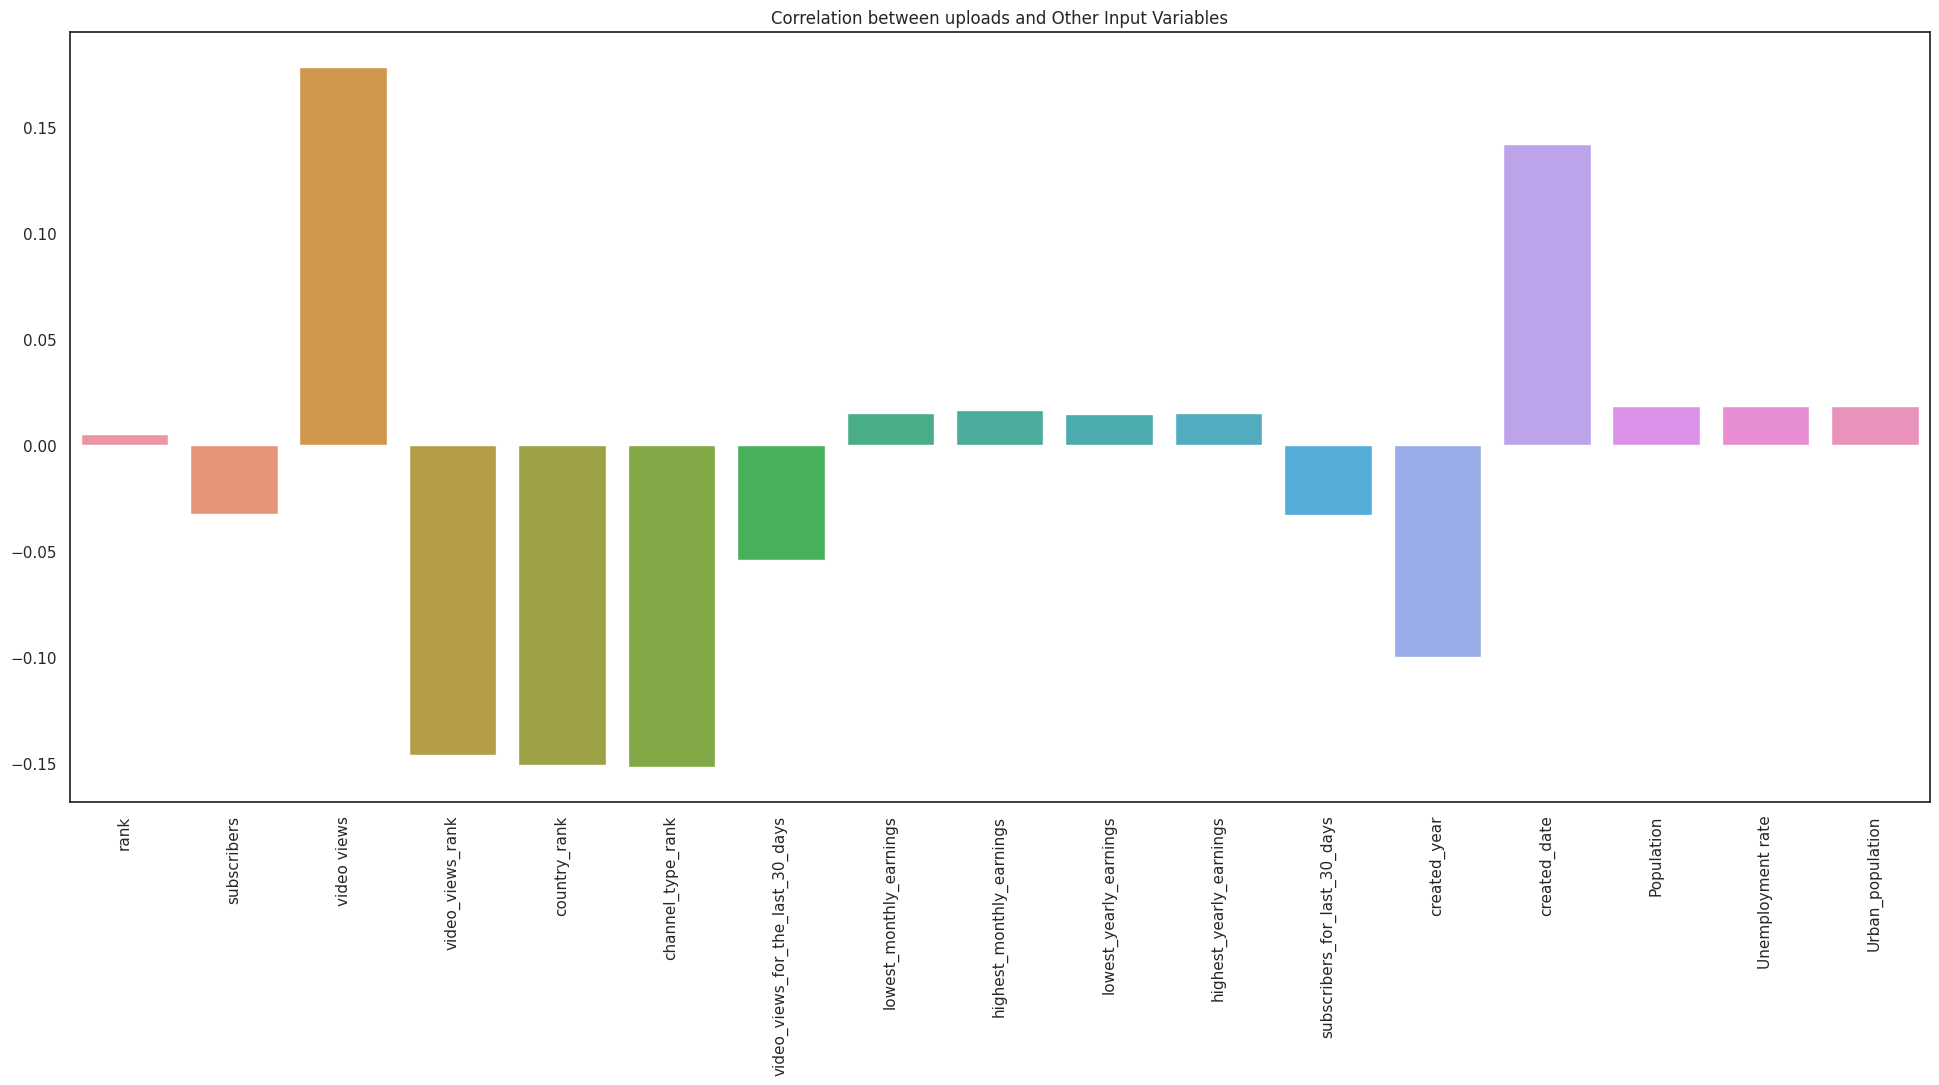

In [ ]:
#@title Display Correlation Data
# Choose a specific variable for correlation
chosen_variable = 'uploads'

# Filter the correlations for the chosen variable
correlations = youtube_df.corr()["uploads"].drop("uploads")

# Create Bar plot using Seaborn
sns.set(style='white')
plt.figure(figsize=(24, 10))
ax = sns.barplot(x=correlations.index, y=correlations.values)
plt.title(f'Correlation between {chosen_variable} and Other Input Variables')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


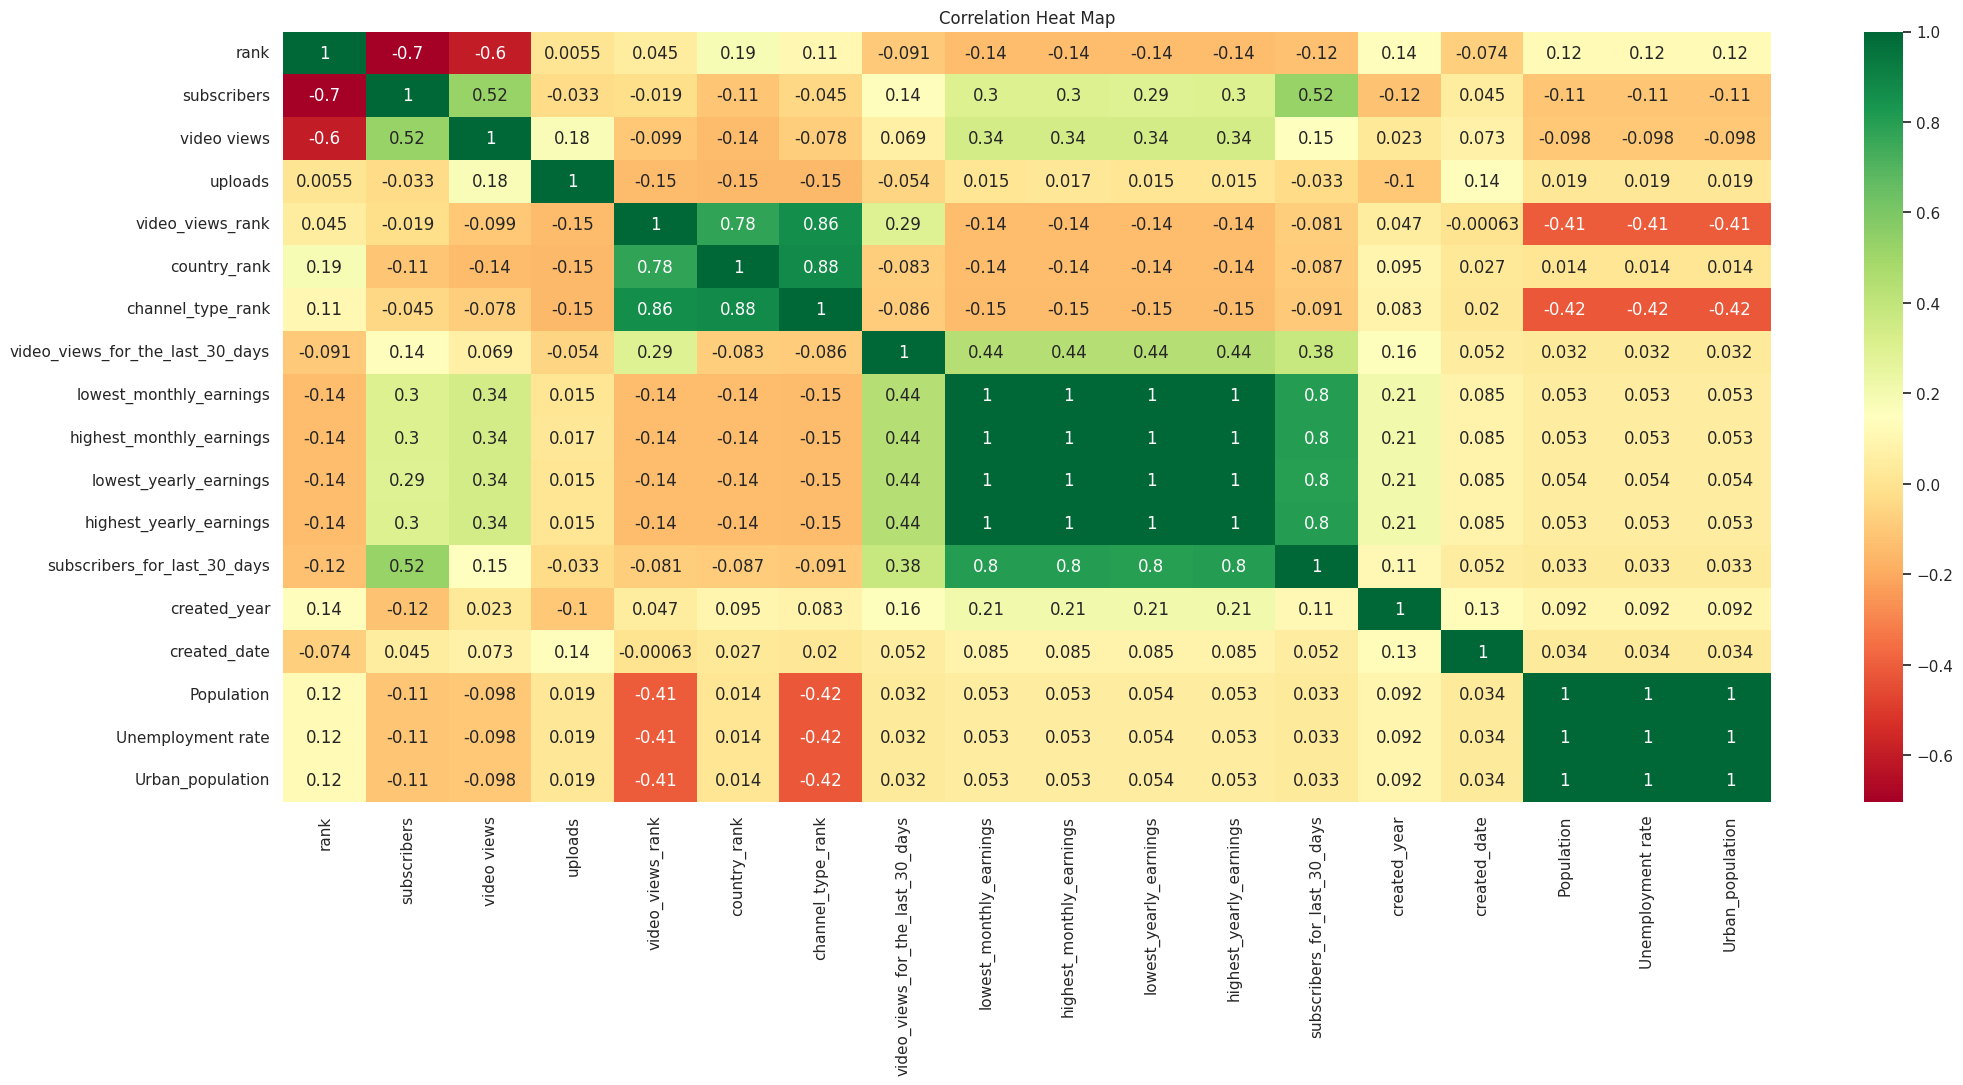

In [ ]:
#@title Visualizing the correlation as a Heat Map
corr = youtube_df.corr()

plt.subplots(figsize=(24,10))
sns.heatmap(corr, cmap='RdYlGn', annot=True)
plt.title('Correlation Heat Map')
plt.show()

In [ ]:
#@title Creating the Linear Regression Model
model = LogisticRegression(solver='liblinear', max_iter=1000)

In [ ]:
#@title Preparing the data (Train vs. Test Split)
#Split the data into features and target
target = youtube_df['video views']
features = youtube_df[['uploads']]

#Split the dataset into features and target
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=7)

# Print the sizes of the training and testing sets
print('Training Sets: Count of Feature instances: ', len(feature_train))
print('Training Sets: Count of Target instances: ', len(target_train))

print('Testing Sets: Count of Feature instances: ', len(feature_test))
print('Testing Sets: Count of Target instances: ', len(target_test))

# Print the first few rows of the features and target dataframes
print('\nFeatures:')
print(features.head())

print('\nTarget:')
print(target.head())

Training Sets: Count of Feature instances:  120
Training Sets: Count of Target instances:  120
Testing Sets: Count of Feature instances:  52
Testing Sets: Count of Target instances:  52

Features:
   uploads
0      741
1     2865
2      389
3      156
4      436

Target:
0    2.836884e+10
1    3.884323e+10
2    1.624155e+10
3    2.707387e+10
4    1.469600e+10
Name: video views, dtype: float64


In [ ]:
#@title Training the LRM
# Train the model on the training data
model.fit(feature_train, target_train.values.ravel())

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
#@title Predict the targets for the given feature_test
target_predicted = model.predict(feature_test)

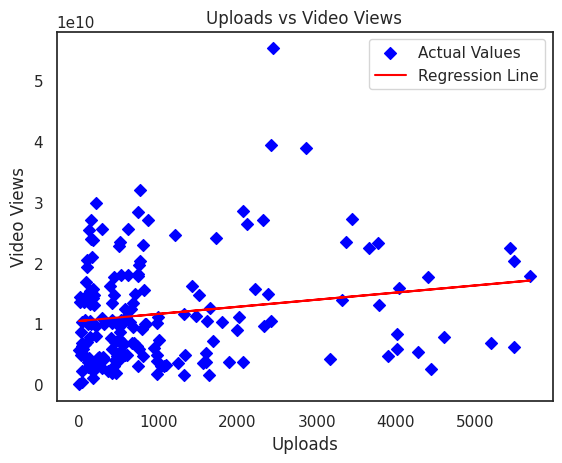

Slope (m): 1170564.4577550292
Intercept (c): 10437645453.926275


In [ ]:
#@title Linear Progression Model (Uploads vs. Video Views)
# Extract the 'subscribers' and 'uploads' columns
y_train = youtube_df['video views'].values.reshape(-1, 1)
x_train = youtube_df['uploads'].values

# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)

# Get the slope (m) and intercept (c) of the regression line
m = model.coef_[0][0]
c = model.intercept_[0]

# Predict subscribers using the model
predicted_subscribers = model.predict(x_train.reshape(-1, 1))

# Visualize the data and regression line
plt.scatter( x_train,y_train, marker='D', color='blue', label='Actual Values')
plt.plot(x_train, predicted_subscribers, color='red', label='Regression Line')
plt.title("Uploads vs Video Views")
plt.xlabel('Uploads')
plt.ylabel('Video Views')
plt.legend()
plt.show()

# Print the slope (m) and intercept (c)
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

In [ ]:
#@title Performing K-fold Cross-Validation and Creating a new Linear Regression Model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a linear regression object
lin_reg = LinearRegression()

# Define the number of folds for cross-validation
k = 5

# Define the cross-validation method (K-fold)
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the model coefficients
coefficients = []

# Perform K-fold cross-validation
for train_index, test_index in kfold.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    lin_reg.fit(X_train, y_train)

    # Store the model coefficients (slope and intercept)
    coefficients.append((lin_reg.coef_[0], lin_reg.intercept_))

# Compute the mean of the coefficients
mean_coefficients = np.mean(coefficients, axis=0)

# Extract the mean slope (m) and intercept (c)
mean_m = mean_coefficients[0]
mean_c = mean_coefficients[1]

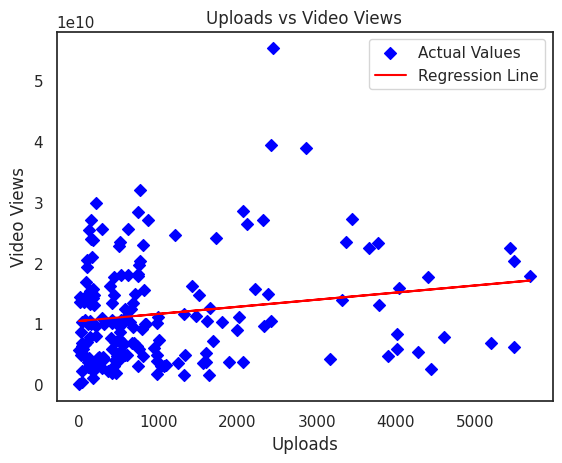

Mean Slope (m): 1177977.925424799
Mean Intercept (c): 10430716574.676172


In [ ]:
#@title Create a Linear Regression Model based on K-fold Cross-Validation results

# Extract the Fe'subscribers' and 'uploads' columns
y_train = youtube_df['video views'].values.reshape(-1, 1)
x_train = youtube_df['uploads'].values

# Create and fit the Linear Regression model with the mean coefficients
mean_model = LinearRegression()
mean_model.coef_ = mean_m
mean_model.intercept_ = mean_c
mean_model.fit(x_train.reshape(-1, 1), y_train)

# Predict subscribers using the model
predicted_uploads = mean_model.predict(x_train.reshape(-1, 1))

# Visualize the data and regression line
plt.scatter(x_train, y_train, marker='D', color='blue', label='Actual Values')
plt.plot(x_train, predicted_uploads, color='red', label='Regression Line')
plt.title("Uploads vs Video Views")
plt.xlabel('Uploads')
plt.ylabel('Video Views')
plt.legend()
plt.show()

# Print the mean slope (m) and intercept (c)
print(f"Mean Slope (m): {mean_m}")
print(f"Mean Intercept (c): {mean_c}")

In [ ]:
#@title Create a function that predicts the views
def predict_the_output_subscribers(uploads, m, c):
    return [mean_m * upload + mean_c for upload in uploads]

In [ ]:
#@title What if a Youtuber has 1k uploads?
uploads_1k = 1000   # Number of uploads
predicted_views_1k = predict_the_output_subscribers([uploads_1k], m, c)[0]
print(f"Views when uploads are {uploads_1k}: {predicted_views_1k:.2f}")

Views when uploads are 1000: 11608694500.10


In [ ]:
#@title What if a Youtuber has 100 uploads?
uploads_100 = 100   # Number of uploads
predicted_views_100 = predict_the_output_subscribers([uploads_100], m, c)[0]
print(f"Views when uploads are {uploads_100}: {predicted_views_100:.2f}")

Views when uploads are 100: 10548514367.22


In [ ]:
#@title What if a Youtuber has 10 uploads?
uploads_10 = 10   # Number of uploads
predicted_views_10 = predict_the_output_subscribers([uploads_10], m, c)[0]
print(f"Views when uploads are {uploads_10}: {predicted_views_10:.2f}")

Views when uploads are 10: 10442496353.93


In [ ]:
#@title What if a Youtuber has 1 upload?
uploads_1 = 1   # Number of uploads
predicted_views_1 = predict_the_output_subscribers([uploads_1], m, c)[0]
print(f"Views when uploads are {uploads_1}: {predicted_views_1:.2f}")

Views when uploads are 1: 10431894552.60


In [ ]:
#@title What if a Youtuber has 0 uploads?
uploads_0 = 0   # Number of uploads
predicted_views_0 = predict_the_output_subscribers([uploads_0], m, c)[0]
print(f"Views when uploads are {uploads_0}: {predicted_views_0:.2f}")

Views when uploads are 0: 10430716574.68


In [ ]:
#@title Linear Regression Based on Video Views and Uploads
# Imports
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

# Load the dataset (Global_YouTube_Statistics_2023_pruned.csv)
path = "/content/drive/MyDrive/Colab/Global_YouTube_Statistics_2023_pruned.csv"
df = pd.read_csv(path, encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Filter out trivial data
df = df[df['video views'] > 1 ]
df.reset_index(drop=True, inplace=True)
df = df[df['uploads'] >= 1]

# Divide views column by a 10,000 to make it easier to read
df["video views"]=df["video views"].div(10000)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Population,Unemployment rate,Urban_population
0,1,T-Series,245000000,2.280000e+07,Music,T-Series,20082,India,IN,Music,...,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,1.366418e+09,5.36,471031528.0
1,3,MrBeast,166000000,2.836884e+06,Entertainment,MrBeast,741,United States,US,Entertainment,...,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,3.282395e+08,14.70,270663028.0
2,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+07,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,3.282395e+08,14.70,270663028.0
3,5,SET India,159000000,1.480000e+07,Shows,SET India,116536,India,IN,Entertainment,...,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,1.366418e+09,5.36,471031528.0
4,7,Kids Diana Show,112000000,9.324704e+06,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,3.282395e+08,14.70,270663028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,991,Natan por Ai,12300000,9.029610e+05,Sports,Natan por AÃ¯Â¿,1200,Brazil,BR,Entertainment,...,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,2.125594e+08,12.08,183241641.0
971,992,Free Fire India Official,12300000,1.674410e+05,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,1.366418e+09,5.36,471031528.0
972,993,Panda,12300000,2.214684e+05,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,268.0,201.0,3200.0,1000.0,2006.0,Sep,11.0,6.683440e+07,3.85,55908316.0
973,994,RobTopGames,12300000,3.741235e+04,Gaming,RobTopGames,39,Sweden,SE,Games,...,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,1.028545e+07,6.48,9021165.0


In [ ]:
#@title Get Rid of Trvial Data (E.g. urban_population)
df = df[["rank","Youtuber","subscribers","video views","uploads"]]
df

,rank,Youtuber,subscribers,video views,uploads
0,1,T-Series,245000000,2.280000e+07,20082
1,3,MrBeast,166000000,2.836884e+06,741
2,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+07,966
3,5,SET India,159000000,1.480000e+07,116536
4,7,Kids Diana Show,112000000,9.324704e+06,1111
...,...,...,...,...,...
970,991,Natan por Ai,12300000,9.029610e+05,1200
971,992,Free Fire India Official,12300000,1.674410e+05,1500
972,993,Panda,12300000,2.214684e+05,2452
973,994,RobTopGames,12300000,3.741235e+04,39


In [ ]:
#@title See what in our graph correlates to subscribers
df.corr()["subscribers"]

<ipython-input-27-57f62f5f2cbc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["subscribers"]


rank          -0.649930
subscribers    1.000000
video views    0.825456
uploads        0.087202
Name: subscribers, dtype: float64

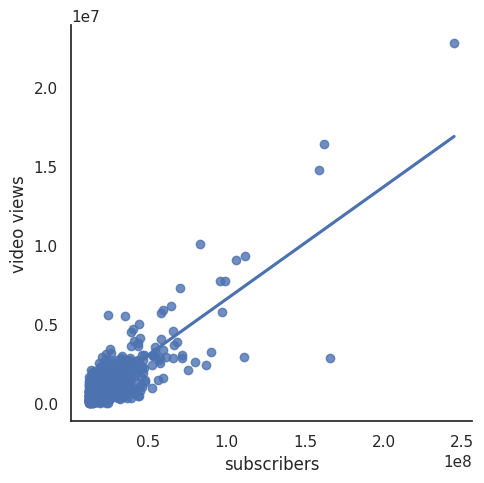

In [ ]:
import seaborn as sns
# Plot the graph between video views and subscribers
sns.lmplot(x="subscribers",y="video views", data=df, fit_reg=True,ci=None)

In [ ]:
#@title Split Training and test data
from sklearn.model_selection import train_test_split
features = ['subscribers','uploads']
X = df.loc[:, features]
y = df.loc[:, ['video views']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, train_size = .80)


In [ ]:
#@title Import linear regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [ ]:
#@title Train Linear Regression model
predictors=['subscribers','uploads']
target="video views"
reg.fit(X_train[predictors], y_train["video views"])
#get the slope and y-intercept
m=reg.coef_
c=reg.intercept_
print(m,c)
y_test

[0.07212197 4.12626701] -540427.3736364834


,video views
368,1.796227e+05
948,4.465772e+05
675,9.978734e+05
761,3.920560e+05
98,2.335580e+06
...,...
871,9.110348e+05
15,3.060812e+06
264,1.041448e+06
422,1.312465e+06


In [ ]:
#@title Use test data
#use our test data to get a prediction
prediction=reg.predict(X_test)
prediction = pd.DataFrame(prediction, columns =["predictions"])
#reset the index on our y_train data
y_test.reset_index(drop=True, inplace=True)
#add our predictions as a column next to target data
y_test["predictions"]=prediction
y_test

,video views,predictions
0,1.796227e+05,9.317109e+05
1,4.465772e+05,3.615801e+05
2,9.978734e+05,5.526504e+05
3,3.920560e+05,4.890688e+05
4,2.335580e+06,2.071197e+06
...,...,...
183,9.110348e+05,4.098460e+05
184,3.060812e+06,4.624533e+06
185,1.041448e+06,1.186082e+06
186,1.312465e+06,8.640303e+05


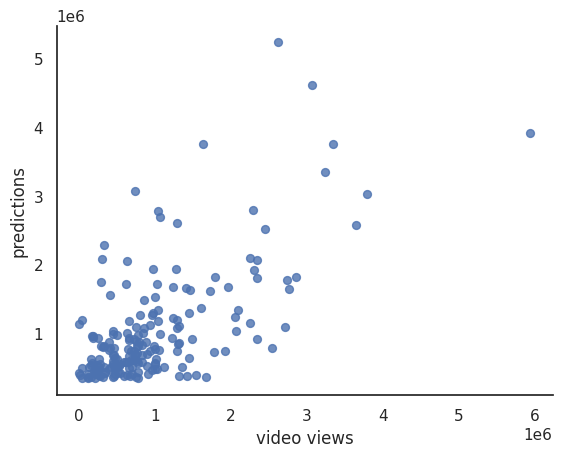

In [ ]:
from matplotlib import pyplot as plt
y_test.plot(kind='scatter', x='video views', y='predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#@title Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_abs_error=mean_absolute_error(y_test['video views'],prediction['predictions'])
print(mean_abs_error)

df.describe()["video views"]

475766.2747577658


count    9.400000e+02
mean     1.131583e+06
std      1.440909e+06
min      2.634000e-01
25%      4.387080e+05
50%      7.891461e+05
75%      1.393327e+06
max      2.280000e+07
Name: video views, dtype: float64

In [ ]:
#@title Method for predictions
def getVideoViews(x1,x2,m,c):
   return [(m[0] * x1 )+ (m[1]*x2)-c]

In [ ]:
#@title How many video views will a person have if he has 20 million subscribers and 200 uploads?
twent_mil_200=getVideoViews(20000000,200,m,c)
print("a person will have",twent_mil_200[0].round(2)*1000,"if they have 20 million subscribers and 200 uploads")

a person will have 1983692080.0 if they have 20 million subscribers and 200 uploads


In [ ]:
#@title How many video views will a person have if he has 13 million subscribers and 30 uploads?
thirteenmil=getVideoViews(13000000,30,m,c)
print("a person will have",thirteenmil[0].round(2)*1000,"if they have 13 million subscribers and 30 uploads")

a person will have 1478136800.0 if they have 13 million subscribers and 30 uploads


In [ ]:
#@title Classification Model
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive - the file is too large,
# so we opted for this method of uploading the file to Colab.
drive.mount('/content/drive')

#Read the file from Google Drive
file_path = '/content/drive/MyDrive/Colab/Global_YouTube_Statistics_2023_pruned.csv' #Set file path as needed. The file will be selected from Google Drive.
youtube_df = pd.read_csv(file_path, encoding='ISO-8859-1') #Gabe removed 'header=1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Simplifying the Data

# Remove rows with 'NaN' values
youtube_df = youtube_df.dropna()

# Select relevant features and target variable
features = ['subscribers', 'video views', 'uploads', 'created_year', 'highest_monthly_earnings', 'Population']
target = 'category'

# Remove non-relevant columns and drop rows with missing values (if any)
youtube_df = youtube_df[features + [target]].dropna()

youtube_df.head()

,subscribers,video views,uploads,created_year,highest_monthly_earnings,Population,category
0,245000000,2.280000e+11,20082,2006.0,9000000.0,1.366418e+09,Music
2,166000000,2.836884e+10,741,2012.0,5400000.0,3.282395e+08,Entertainment
3,162000000,1.640000e+11,966,2006.0,7900000.0,3.282395e+08,Education
4,159000000,1.480000e+11,116536,2006.0,7300000.0,1.366418e+09,Shows
8,106000000,9.047906e+10,493,2016.0,195800.0,1.443735e+08,People & Blogs


<ipython-input-40-83d7eb3362d4>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = youtube_df.corr()


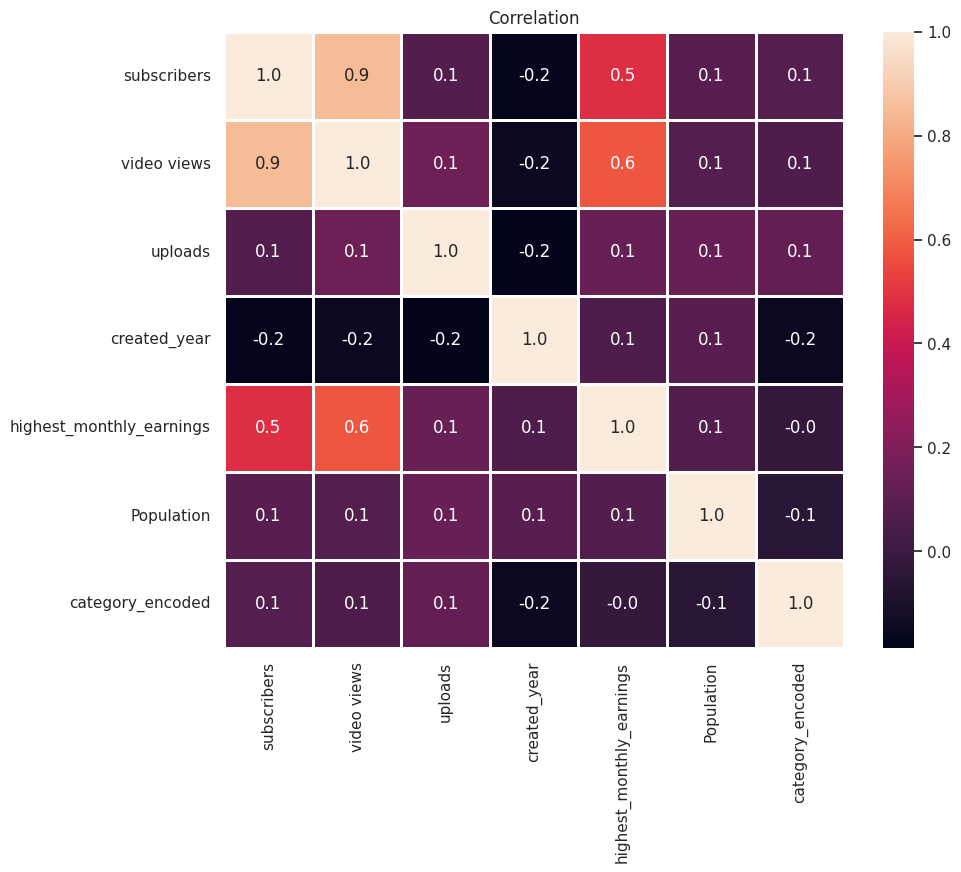

In [ ]:
#@title Displaying correlations
# Calculate the correlation between channel category and all features
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
youtube_df['category_encoded'] = label_encoder.fit_transform(youtube_df["category"])

correlation = youtube_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=1)
plt.title('Correlation')
plt.show()

In [ ]:
#@title Creating the Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = youtube_df[features]
y = youtube_df['category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Create and train a logistic regression model
logreg_model = LogisticRegression(max_iter=40000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

unique_categories = sorted(y.unique())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=unique_categories, zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.27710843373493976
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         0
           1       1.00      0.00      0.00         9
           2       1.00      0.00      0.00         9
           3       0.29      0.83      0.43        46
           4       1.00      0.00      0.00        10
           5       1.00      0.00      0.00        20
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         0
           8       0.26      0.22      0.24        32
           9       1.00      0.00      0.00         4
          10       1.00      0.00      0.00         1
          11       1.00      0.00      0.00        26
          12       1.00      1.00      1.00         0
          13       0.50      0.33      0.40         3
          14       1.00      0.00      0.00         2
          15       1.00      0.00      0.00         1
          16       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


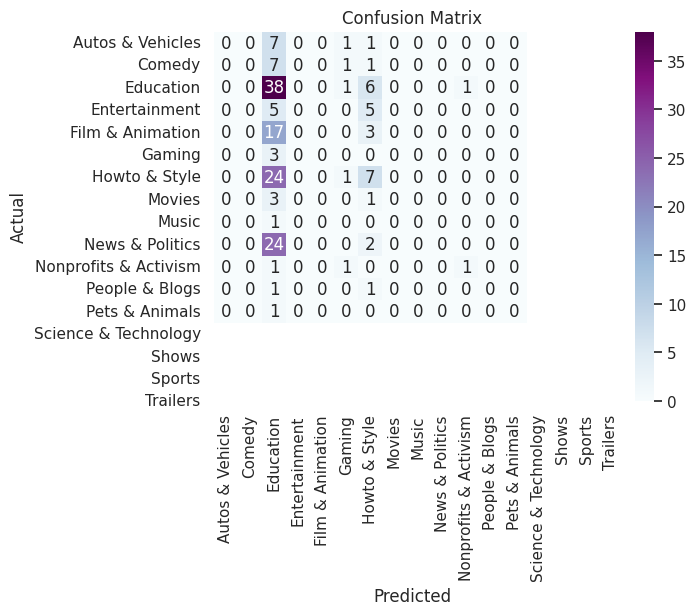

In [ ]:
#@title Visualizing Results with a Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Results Analysis

print("""Upon exploring possibilites for potential classification problems, we believe our dataset is better suited to
linear regression problems. The sample classification problem above showcases some of the issues the dataset holds for
classification problems. These issues include relatively weak correlations between many of the fields, a wide range of unique
values in categorical fields, a relatively small sample which by the nature of the dataset is skewed towards highly
succesful YouTube channels.""")

Upon exploring possibilites for potential classification problems, we believe our dataset is better suited to
linear regression problems. The sample classification problem above showcases some of the issues the dataset holds for
classification problems. These issues include relatively weak correlations between many of the fields, a wide range of unique
values in categorical fields, a relatively small sample which by the nature of the dataset is skewed towards highly
succesful YouTube channels.
